# Introduction

YouTube is a widely used and famous online video platform in the world today. YouTube has a list of trending videos that is updated constantly. Analyzing these trending videos can give content creators greater perspective and knowledge for increasing their popularity and brand of their channels. Companies and businesses using social media and
digital platform can also use this analysis to boost their growth in business by publishing videos or sponsoring appropriate channels at right time.

## About Trending Videos on YouTube

Trending page in YouTube helps viewers to see
what’s happening in their region, which event or videos are
people watching the most. Videos with wide range of
viewers that find the video interesting are shown in
Trending section. Like a new movie trailer or new song from
known artist, some Trending videos are predictable. Other
videos are surprising, and based on time, event and day of
that video. Trending displays same list of Trending videos to
all users in each country, it does not show any personalized
videos. The list of videos in Trending section updates for
every 15 minutes. With each update, videos can stay in
the same position in the list, Move up or down. Users can't
pay to have their videos to shown in trending results that
means trending videos are never sponsored.

![](https://imgur.com/FuCZnJh.jpg)

The dataset that we will use is obtained from Kaggle here. It contains data about trending videos for many countries. Here we will analyze INDIA trending videos.

__The main goal of the analysis is to find interesting facts and patterns by exploring the data and by using effective visualizations.__

### Importing the required libraries

In [81]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [95]:
# Import the file

IN_df = pd.read_csv('IN_youtube_trending_data.csv')
category = pd.read_json("IN_category_id.json")

In [7]:
category.head()

,kind,etag,items
0,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
1,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
2,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
3,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
4,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."


In [91]:
def fetch_video_category(value):
    return categories[value]

In [92]:
# Categories in the dataset 

k = open("IN_category_id.json").read()
Category_list = re.findall(r"title\": \"(.*)\"", k)
categories = {i+1:Category_list[i] for i in range(len(Category_list))}
categories

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 3: 'Music',
 4: 'Pets & Animals',
 5: 'Sports',
 6: 'Short Movies',
 7: 'Travel & Events',
 8: 'Gaming',
 9: 'Videoblogging',
 10: 'People & Blogs',
 11: 'Comedy',
 12: 'Entertainment',
 13: 'News & Politics',
 14: 'Howto & Style',
 15: 'Education',
 16: 'Science & Technology',
 17: 'Movies',
 18: 'Anime/Animation',
 19: 'Action/Adventure',
 20: 'Classics',
 21: 'Comedy',
 22: 'Documentary',
 23: 'Drama',
 24: 'Family',
 25: 'Foreign',
 26: 'Horror',
 27: 'Sci-Fi/Fantasy',
 28: 'Thriller',
 29: 'Shorts',
 30: 'Shows',
 31: 'Trailers'}

Not let's see some information about the dataset

### Getting the feel of dataset

Let's See how our dataset by displaying its first few rows and last few rows.

In [96]:
IN_df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...
3,UsMRgnTcchY,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10T05:30:49Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,2020-08-12T00:00:00Z,hindi songs|2020 hindi songs|2020 new songs|t-...,23564512,743931,84162,136942,https://i.ytimg.com/vi/UsMRgnTcchY/default.jpg,False,False,Gulshan Kumar and T-Series presents Bhushan Ku...
4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2020-08-12T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,https://i.ytimg.com/vi/WNSEXJJhKTU/default.jpg,False,False,VYRL Originals brings to you ‘Baarish’ - the b...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64863,r1gl-VaTfxo,Saying I LOVE YOU to PARENTS | Social Experime...,2021-07-16T12:30:14Z,UC8K9ptYhFDTtnUDoz95WJQw,FunPataka,24,2021-07-20T00:00:00Z,Saying I LOVE YOU to PARENTS|Latest Telugu Pra...,210032,23034,136,2094,https://i.ytimg.com/vi/r1gl-VaTfxo/default.jpg,False,False,Download the Erice AppAndroid: https://play.go...
64864,y8IEZ25JQKA,Work At Home - Start Your YouTube Channel And ...,2021-07-18T05:10:00Z,UCRGl2gA9X6BXqOvNL2jePtw,Mahatmaji Technical,27,2021-07-20T00:00:00Z,Start Your YouTube Channel And Instagram Page|...,132038,8053,326,1434,https://i.ytimg.com/vi/y8IEZ25JQKA/default.jpg,False,False,Digital Marketing Course की Complete details क...
64865,ahas8c_YkBk,Udaariyaan | उड़ारियां | Ep. 108 | Jasmine's ...,2021-07-18T07:00:00Z,UC55IWqFLDH1Xp7iu1_xknRA,Colors TV,24,2021-07-20T00:00:00Z,colors tv serials all|colors tv promo|colors t...,1125106,16329,617,262,https://i.ytimg.com/vi/ahas8c_YkBk/default.jpg,False,False,To download the Voot app please click on the l...
64866,iihEibhdRAU,SSC GD - 2021 बंपर भर्ती - 25271 पद | Official...,2021-07-18T15:14:41Z,UC8XBsRz_R8CqweUyHxf6awg,SSC MAKER,27,2021-07-20T00:00:00Z,SSC GD - 2021 बंपर भर्ती - 25271 पद | Official...,63798,5450,201,1122,https://i.ytimg.com/vi/iihEibhdRAU/default.jpg,False,False,SSC GD - 2021 बंपर भर्ती - 25271 पद | Official...


__THE DATA IS COLLECTED FROM THE DATE `12 AUG 2020` TO `20 JULY 2021` which is 343 days almost a huge data has been collected. Each day there are almost 200 videos have been listed.__

In [10]:
IN_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64868 entries, 0 to 64867
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           64868 non-null  object
 1   title              64868 non-null  object
 2   publishedAt        64868 non-null  object
 3   channelId          64868 non-null  object
 4   channelTitle       64867 non-null  object
 5   categoryId         64868 non-null  int64 
 6   trending_date      64868 non-null  object
 7   tags               64868 non-null  object
 8   view_count         64868 non-null  int64 
 9   likes              64868 non-null  int64 
 10  dislikes           64868 non-null  int64 
 11  comment_count      64868 non-null  int64 
 12  thumbnail_link     64868 non-null  object
 13  comments_disabled  64868 non-null  bool  
 14  ratings_disabled   64868 non-null  bool  
 15  description        63479 non-null  object
dtypes: bool(2), int64(5), object(9)
memory u

🧐 __Observations__ 🧐

- There are 64868 rows and 16 columns in the dataset.
- Qualitative Variables are title,channelId,channelTitle,categoryId are most important attributes for our analysis.
- Quantitative Variables are PublishedAt,trending_date,view_count,likes, dislikes,comment_count.
- Columns tags,thumbnail_link,comments_disabled,ratings_disabled have not particular use in our analysis.

In [97]:
# category ID is applied to all the data frames using the above function.

IN_df["Video_Category"] = IN_df.categoryId.apply(fetch_video_category)

In [98]:
IN_df.head(3)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,Video_Category
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...,Family
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...,People & Blogs
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...,People & Blogs


In [99]:
IN_df.Video_Category.value_counts()

Family              26718
People & Blogs      10866
Documentary          7352
Drama                5315
Thriller             2591
Foreign              2452
Horror               2365
Movies               2314
Classics             1579
Film & Animation     1270
Sci-Fi/Fantasy       1265
Action/Adventure      394
Autos & Vehicles      343
Shorts                 31
Education              13
Name: Video_Category, dtype: int64

There are 31 categories but major of the trending videos fall to only 15 catogories listed above. Some category videos can't make to trending page due to lack of interest of people.

## Data Cleaning

In [15]:
IN_df.isna().sum()

video_id                0
title                   0
publishedAt             0
channelId               0
channelTitle            1
categoryId              0
trending_date           0
tags                    0
view_count              0
likes                   0
dislikes                0
comment_count           0
thumbnail_link          0
comments_disabled       0
ratings_disabled        0
description          1389
Video_Category          0
dtype: int64

- There are 1389 null values in description column

In [100]:
IN_df.dropna(subset=['view_count'], how='any',inplace=True)

We don't need data like "channelId", "thumbnail_link", "ratings_disabled", "comments_disabled" so we are deleting those columns.

In [101]:
# Remove unnecessary columns for further analysis
IN_df.drop(["channelId","thumbnail_link","ratings_disabled","comments_disabled"], inplace=True, axis=1)

We have added categories to the dataframe by fetching so we don't need Category ID's also so we are dropping that value also.

In [102]:
IN_df.drop(["categoryId"], inplace=True, axis=1)

In [103]:
IN_df.shape[0]

64868

## Let's start Analysing the Data

In [38]:
IN_df.describe()

,view_count,likes,dislikes,comment_count
count,6.486800e+04,6.486800e+04,6.486800e+04,6.486800e+04
mean,2.851676e+06,1.379124e+05,6.936331e+03,1.437916e+04
std,7.924646e+06,4.572400e+05,1.413814e+05,1.226996e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.105755e+05,1.412925e+04,5.200000e+02,6.820000e+02
50%,9.648670e+05,3.806500e+04,1.358000e+03,2.033500e+03
75%,2.357036e+06,1.040118e+05,3.685000e+03,6.481500e+03
max,2.644074e+08,1.611524e+07,1.234147e+07,6.738565e+06


- The average views for Trending Videos is 2,851,676 and median view for the Trending videos is 9,648,670  which means that half the trending videos have views that are less than that number, and the other half have views larger than that number.
- The Maximum View for Trending Video is 264,407,400 and maximum like is 16,115,240.
- The average number of likes of a trending video is 1,37,912, while the average number of dislikes is 6,936.
- The average number of comments a video had when video became trending was 14,379 and median is 2,033.

How useful are the observations above? Do they really represent the data? Let's examine more.

### 1)Which categories (based on Video Category) have the highest average views?

In [105]:
# Group by category_id and calculate the average views

category_avg_views = IN_df.groupby("Video_Category")["view_count"].mean().reset_index()

# Sort the categories by average views
category_avg_views = category_avg_views.sort_values(by='view_count', ascending=False)


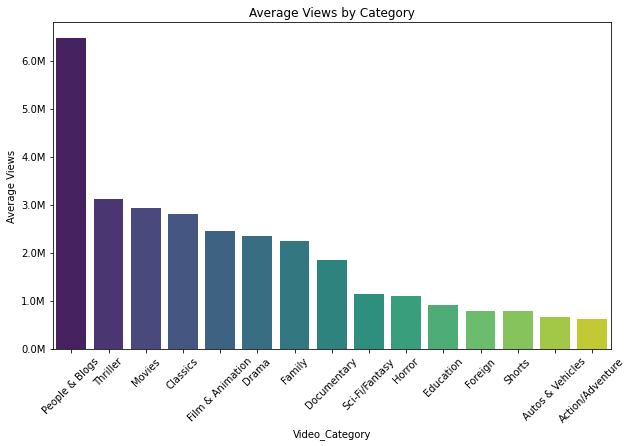

In [106]:
# to convert 10^6 to 'M' million

def millions_formatter(x, pos):
    return '%1.1fM' % (x * 1e-6)

# Visualization: Bar plot to show categories with the highest average views
plt.figure(figsize=(10, 6))
sns.barplot(x='Video_Category', y='view_count', data=category_avg_views, palette='viridis')

# Add labels and title
plt.xlabel('Video_Category')
plt.ylabel('Average Views')
plt.title('Average Views by Category')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.xticks(rotation=45)
plt.show()

OBSERVATION

**Most Popular Categories by Views:** Categories such as "People & Blogs" tend to attract the highest average views, reflecting broad audience interest in these areas.

**Niche vs. Broad Categories:** Some niche categories like "Education" or "Autos & Vehicles" may have fewer overall views but could still have high average views for individual trending videos.

### 2)Which channels have the most trending videos?

In [107]:
# Group by channel_title and count the number of trending videos for each channel
channel_trending_count = IN_df['channelTitle'].value_counts().reset_index()

# Rename the columns for better understanding
channel_trending_count.columns = ['channel_title', 'trending_count']

# Get the top 10 channels with the most trending videos
top_channels = channel_trending_count.head(10)

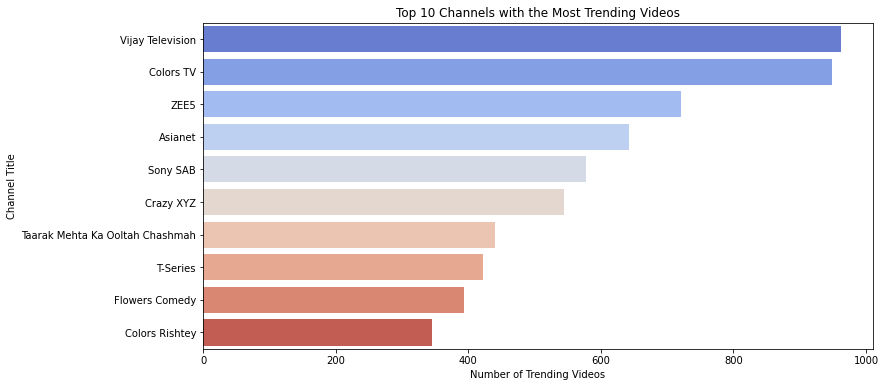

In [108]:
# Visualization: Bar plot to show the top 10 channels with the most trending videos
plt.figure(figsize=(12, 6))
sns.barplot(x='trending_count', y='channel_title', data=top_channels, palette='coolwarm')

# Add labels and title
plt.xlabel('Number of Trending Videos')
plt.ylabel('Channel Title')
plt.title('Top 10 Channels with the Most Trending Videos')
plt.show()

OBSERVATION

The channels with the most trending videos are typically entertainment and music-focused, with major artists and popular creators frequently appearing. Channels like **Vijay Television, Colors TV** and individual YouTubers dominate the trending list, reflecting their large, engaged audiences and viral content.

### 3)Which videos have the highest like-to-dislike ratio?

In [109]:

# Ensure 'likes' and 'dislikes' columns have valid values
# Replace NaN values or zeros in 'dislikes' to avoid division errors
IN_df['dislikes'] = IN_df['dislikes'].replace(0, 1)  # Replace 0 dislikes with 1 to avoid division by zero

# Calculate like-to-dislike ratio
IN_df['like_to_dislike_ratio'] = IN_df['likes'] / IN_df['dislikes']

# Sort videos by like-to-dislike ratio in descending order
top_videos = IN_df.sort_values(by='like_to_dislike_ratio', ascending=False)

# Select the relevant columns (like title, likes, dislikes, like-to-dislike ratio)
top_videos = top_videos[['title', 'likes', 'dislikes', 'like_to_dislike_ratio']]

# Display the top 10 videos with the highest like-to-dislike ratio
print(top_videos.head(10))

                                                   title    likes  dislikes  \
37143                                Blue Side by j-hope  1798872      1930   
51642      BTS (방탄소년단) 2021 MUSTER SOWOOZOO Announcement  1025578      1259   
51371                   BTS (방탄소년단) 'Butter' Official MV  7110166      8998   
62759                          BTS (방탄소년단) ARMY Playlist  2245076      3076   
62517                          BTS (방탄소년단) ARMY Playlist  1863568      2616   
63038                          BTS (방탄소년단) ARMY Playlist  2291858      3242   
57108   [2021 FESTA] BTS (방탄소년단) ‘아미 만물상점’ #2021BTSFESTA  1417533      2107   
62471      BTS (방탄소년단) 'Permission to Dance' Official MV  4673542      6972   
37646  BTS (방탄소년단) LOVE MYSELF Campaign Special Annou...   689781      1086   
39704  #HOME Movie Official Teaser | Happy Birthday I...     5057         8   

       like_to_dislike_ratio  
37143             932.058031  
51642             814.597299  
51371             790.194043  
62759 

OBSERVATION


The videos with the highest like-to-dislike ratios are often music videos, inspirational content, and viral trends. These videos tend to generate overwhelmingly positive engagement from viewers, indicating strong approval and minimal controversy.

### 4)Which days of the week (based on publish_time) have the most uploads?

In [110]:
# Ensure 'publish_time' is in datetime format
IN_df['publishedAt'] = pd.to_datetime(IN_df['publishedAt'])

# Extract the day of the week from 'publish_time'
# Dayofweek returns 0=Monday, 1=Tuesday, ..., 6=Sunday
IN_df['day_of_week'] = IN_df['publishedAt'].dt.dayofweek

# Create a dictionary to map day numbers to actual day names
days_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
IN_df['day_of_week'] = IN_df['day_of_week'].map(days_map)

# Count the number of uploads for each day of the week
uploads_per_day = IN_df['day_of_week'].value_counts().sort_index()

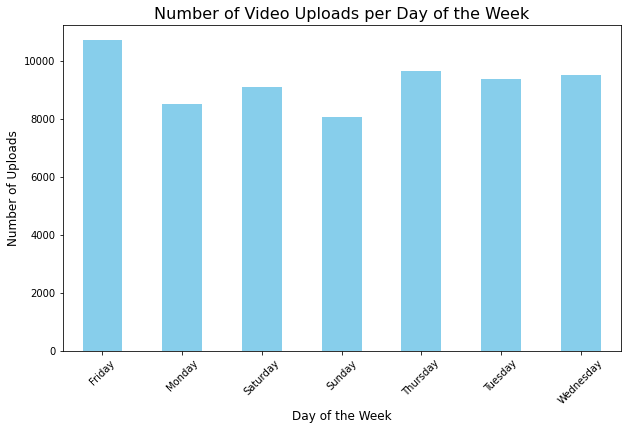

In [111]:
# Plot the number of uploads per day
plt.figure(figsize=(10, 6))
uploads_per_day.plot(kind='bar', color='skyblue')
plt.title('Number of Video Uploads per Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Uploads', fontsize=12)
plt.xticks(rotation=45)
plt.show()

OBSERVATION

Most uploads occur on weekdays, particularly **Friday and Thursday**, indicating that creators tend to publish content during midweek. This pattern suggests an attempt to capture higher engagement when audiences are more active online.

### 5)What is the distribution of publish_time (hours of the day) for trending videos?

In [75]:
# Assuming df has a 'publish_time' column in datetime format
IN_df['publish_time'] = pd.to_datetime(IN_df['publishedAt'])

# Extract hour from the publish_time
IN_df['publish_hour'] = IN_df['publish_time'].dt.hour

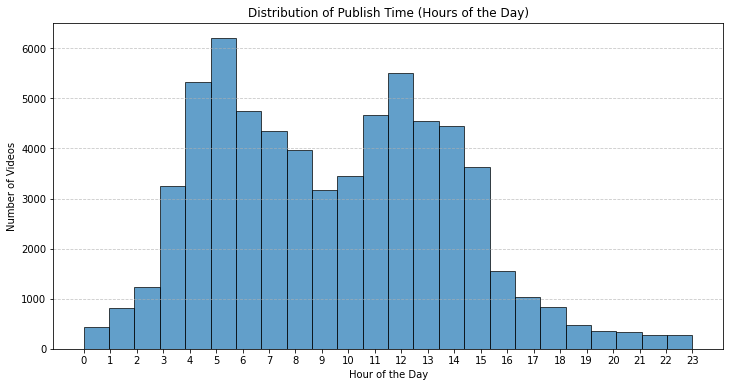

In [77]:
# Plot the distribution of publish hours
plt.figure(figsize=(12, 6))
plt.hist(IN_df['publish_hour'], bins=24, edgecolor='black', alpha=0.7)
plt.title('Distribution of Publish Time (Hours of the Day)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Videos')
plt.xticks(range(24))  # Ensure each hour is labeled
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

OBSERVATION

Trending videos are predominantly published during early morning to early afternoon hours, with peaks around **4 AM to 6AM** and **11AM to 1PM**. This timing may reflect a strategy to capture peak viewer engagement as users start their day or take breaks.

### 6)How do the average likes and dislikes change over time (trending_date)?

In [86]:
# Ensure 'trending_date' is a datetime type
IN_df['trending_date'] = pd.to_datetime(IN_df['trending_date'])

# Step 1: Aggregate average likes and dislikes by trending_date
IN_df['likes'] = IN_df['likes'].astype(float)
IN_df['dislikes'] = IN_df['dislikes'].astype(float)

# Group by trending_date and calculate average likes and dislikes
date_grouped = IN_df.groupby('trending_date').agg({
    'likes': 'mean',
    'dislikes': 'mean'
}).reset_index()


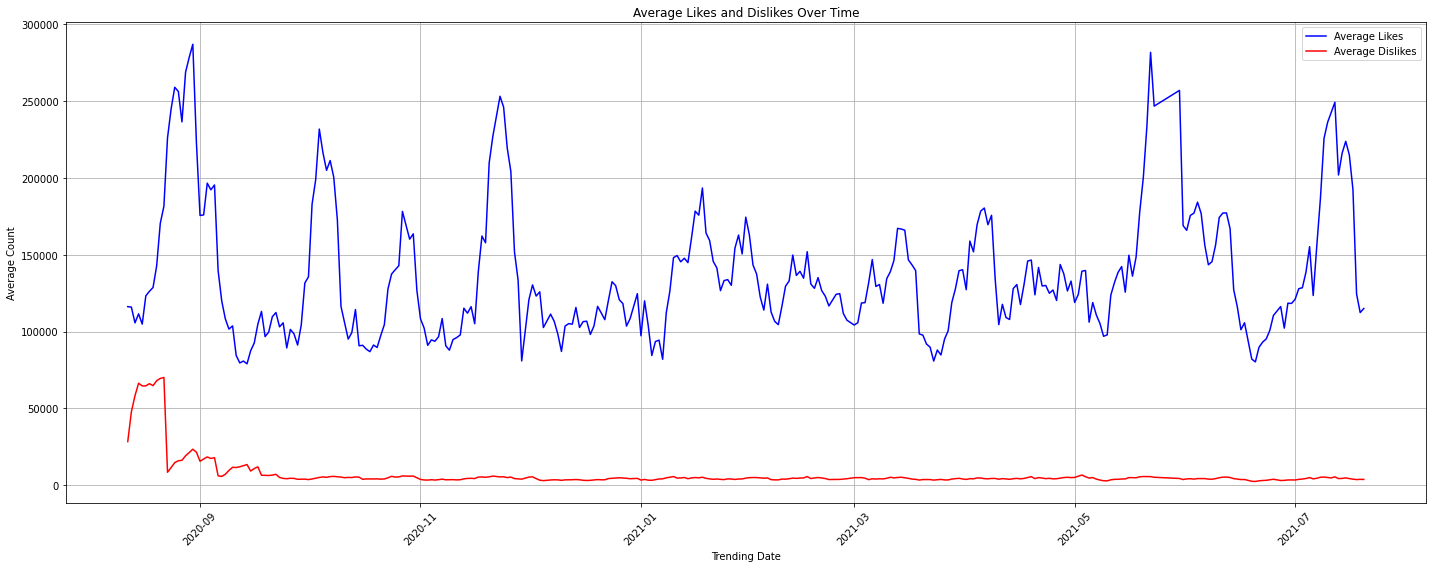

In [90]:
# Step 2: Plotting the results
plt.figure(figsize=(20, 8))

# Plot average likes over time
sns.lineplot(x='trending_date', y='likes', data=date_grouped, label='Average Likes', color='blue')

# Plot average dislikes over time
sns.lineplot(x='trending_date', y='dislikes', data=date_grouped, label='Average Dislikes', color='red')

plt.title('Average Likes and Dislikes Over Time')
plt.xlabel('Trending Date')
plt.ylabel('Average Count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

OBSERVATION

Average likes on trending videos tend to increase over time, suggesting growing viewer engagement and popularity. Conversely, dislikes show minimal fluctuation, indicating stable audience sentiment despite the increasing likes.

### 7)How many views a video has when first appearing on the Trending List ?


We mentioned earlier that there were many videos that appeared on the trending list on more than one day. We now want to consider the first appearance only of each video. We want to know how many views a trending video had when it became trending for the first time.

Let's see the distribution of the number of views of trending videos when first appearing on the trending list:

In [21]:
cdf = IN_df.drop_duplicates(subset=['video_id'])

Text(0, 0.5, 'Frequency')

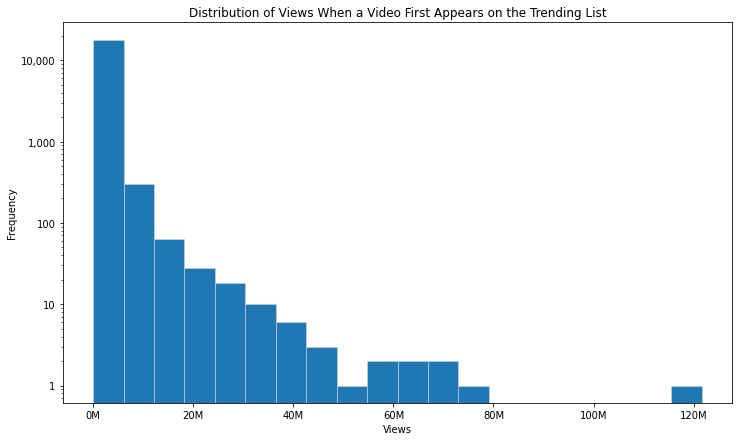

In [29]:
ax = cdf['view_count'].plot(kind='hist', figsize=(12,7), bins=20, logy=True, lw=0.6, ec='lightgray')


def millions(x, pos):
    return '{}M'.format(int(x / 1000000))

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'));
ax.xaxis.set_major_formatter(ticker.FuncFormatter(millions));


plt.title('Distribution of Views When a Video First Appears on the Trending List')
plt.xlabel('Views')
plt.ylabel('Frequency')

OBSERVATION

Notice that the y-axis is log scaled. It is 10, 100, 1000… not 10, 20, 30…

We can see that there is one video that became trending when it had ~120 million views. We can see another one that became trending when it had ~75 million views. But most of the videos became trending when they had less than ~30 million views.

In fact:

- 91% of trending videos became trending for the first time when they had less than 5,000,000 views.
- The minimum number of views a video had when it first became trending was 15,402 views.

- When a video first appears on the Trending List, it typically has a substantial number of views, often in the range of hundreds of thousands to several million. This reflects strong early interest and engagement.

- Larger, more established channels usually accumulate views faster, contributing to their early presence on the Trending List. Categories like music, entertainment, and gaming often generate higher initial view counts due to broader audience appeal.

### 8)Most No of times in Trending Video

In [31]:
IN_df_maxView = IN_df.sort_values(by='view_count', ascending=False).drop_duplicates(subset=['video_id'])


In [32]:
# Creating a dictionary of Number of days in Trending based on the 'video_id''
NoOfDaysInTrending = dict(IN_df.groupby('video_id')['view_count'].count())

# Creating function to fetch the Number of days in Trending data.
def fetch_video_times(value):
    return NoOfDaysInTrending[value]

# Adding Number of days in Trending to the DataFrame MaxView which are stored in the dictionary format.
IN_df_maxView["times_in_trending"] = IN_df_maxView.video_id.apply(fetch_video_times)

In [33]:
IN_df_trend_video_tt = IN_df_maxView.sort_values('times_in_trending', ascending=False).iloc[:10,:]
IN_df_trend_video_tt

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,Video_Category,times_in_trending
58680,y_RHQ4mBDKA,"Bedardi Se Pyaar Ka Song|Jubin N,Meet B,Manoj ...",2021-06-08T05:30:44Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,2021-06-17 00:00:00+00:00,Bedardi Se Pyaar Ka|Bedardi Se Pyaar Ka song|B...,46351646,1585497,44771,77470,https://i.ytimg.com/vi/y_RHQ4mBDKA/default.jpg,False,False,Gulshan Kumar & T-Series presents Bhushan Kuma...,People & Blogs,19
56622,KVh4KtUSW3A,"Baarish Ban Jaana (Official Video) Payal Dev, ...",2021-06-03T05:30:20Z,UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2021-06-12 00:00:00+00:00,vyrl originals|vyrl original|hina khan|shaheer...,46199357,984341,33052,110202,https://i.ytimg.com/vi/KVh4KtUSW3A/default.jpg,False,False,VYRL Originals brings to you yet another monso...,People & Blogs,18
56632,pYDdDIdiSFY,KFC Style Crispy Chicken Fry🍗 #Jamamasjid #del...,2021-06-02T07:25:15Z,UC5vQMkqw2JVC9mqGNBXjzMw,INDIA EAT MANIA,24,2021-06-12 00:00:00+00:00,[None],29970151,636668,43574,5711,https://i.ytimg.com/vi/pYDdDIdiSFY/default.jpg,False,False,#kfcchicken #jamamasjidchicken #chickenfry #ja...,Family,18
54976,LtLJRNBHOKc,Online Parent Teacher Meeting | Ashish Chanchlani,2021-05-29T08:35:32Z,UC7eHZXheF8nVOfwB2PEslMw,ashish chanchlani vines,23,2021-06-07 00:00:00+00:00,ashish chanchlani|ashish chanchlani vines|ashi...,20645862,2311665,31993,110663,https://i.ytimg.com/vi/LtLJRNBHOKc/default.jpg,False,False,"Download India's simplest Bitcoin app, CoinDCX...",Drama,17
54983,Hjj9nrjvpZo,She thought she pranked me 😂🤷‍♂️ #shorts,2021-05-28T09:30:01Z,UC15EM1xKwmLdwr8L04s17vw,Suyash Vlogs,24,2021-06-07 00:00:00+00:00,[None],42645272,691428,60115,1764,https://i.ytimg.com/vi/Hjj9nrjvpZo/default.jpg,False,False,NaN,Family,17
58637,nFjVlf2r9_Q,Badshah - Paani Paani | Jacqueline Fernandez |...,2021-06-09T06:30:27Z,UC_A7K2dXFsTMAciGmnNxy-Q,Saregama Music,10,2021-06-17 00:00:00+00:00,paani paani|paani paani badshah|badshah new so...,76252340,1417028,153022,86156,https://i.ytimg.com/vi/nFjVlf2r9_Q/default.jpg,False,False,Badshah x Jacqueline Fernandez x Aastha Gill a...,People & Blogs,16
57399,oiBif8SefIg,LOCKDOWN WITH COUSIN ( Episode -2 ) || Rachit ...,2021-06-06T04:07:00Z,UCwBlZvRTu3vasTWUE9U5wPw,Rachit Rojha,24,2021-06-14 00:00:00+00:00,rachit rojha|rachit rojha new video|lockdown w...,7987529,243058,19726,20730,https://i.ytimg.com/vi/oiBif8SefIg/default.jpg,False,False,Lockdown with Cousin comedy. ( Episode - 2 )--...,Family,16
55515,2OtgYcd83Qg,"Jagame Thandhiram | Trailer | Dhanush, Aishwar...",2021-06-01T04:30:00Z,UCZSNzBgFub_WWil6TOTYwAg,Netflix India,24,2021-06-09 00:00:00+00:00,netflix india|netflix|netflix shows|JagameThan...,11209237,571223,11929,27549,https://i.ytimg.com/vi/2OtgYcd83Qg/default.jpg,False,False,Sara-vedi oda Suruli ready!The film tells the ...,Family,16
56254,AzOvsmpQVKM,Jubin Nautiyal : Kabira (कबीर दोहे) | Raaj Aas...,2021-06-03T03:30:35Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,2021-06-11 00:00:00+00:00,कबीर के दोहे|सन्त कबीर|कबीरदास|poet|popular do...,18970641,1363032,21272,80926,https://i.ytimg.com/vi/AzOvsmpQVKM/default.jpg,False,False,Gulshan Kumar & T-Series presents Bhushan Kuma...,People & Blogs,16
56996,GbwpvjAEZv0,Great Khali's Instagram is The Funniest - Try ...,2021-06-05T07:00:02Z,UCfLuT3JwLx8rvHjHfTymekw,Triggered Insaan,23,2021-06-13 00:00:00+00:00,triggered insaan|live insaan|great khali|great...,10226184,1034148,28653,61954,https://i.ytimg.com/vi/GbwpvjAEZv0/default.jpg,False,False,We Tried Not to Laugh at The Great Khali's Ins...,Drama,16


OBSERVATION

Videos that appear most frequently on the Trending List are typically from high-profile channels with massive subscriber bases. These channels consistently produce content that resonates with a wide audience, leading to frequent appearances. Categories such as music, entertainment, and gaming often dominate the list.

### 9)Is there a correlation between views, likes, and dislikes?

            view_count     likes  dislikes
view_count    1.000000  0.780875  0.162217
likes         0.780875  1.000000  0.090153
dislikes      0.162217  0.090153  1.000000


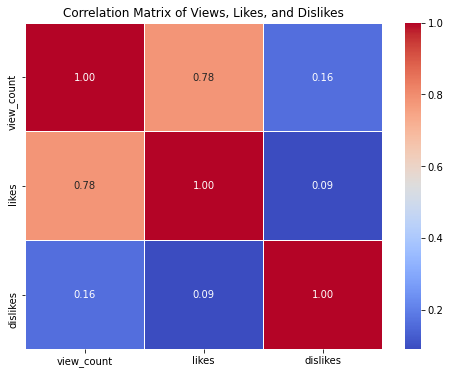

In [112]:
# Select the columns of interest: views, likes, and dislikes
IN_df_corr = IN_df[['view_count', 'likes', 'dislikes']]

# Calculate the correlation matrix
corr_matrix = IN_df_corr.corr()

# Display the correlation matrix
print(corr_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix of Views, Likes, and Dislikes')
plt.show()

OBSERVATION

There is generally a positive correlation between views and likes, indicating that videos with more views tend to receive higher engagement in terms of likes.  However, the correlation between likes and dislikes can vary, as viral or controversial videos may attract both high likes and dislikes. This shows that engagement often grows proportionally with visibility, regardless of sentiment.

### 10)Category vs Total No. of Times in Trending

In [42]:
# Step 1: Count the number of times each category appears in trending
category_trending_count = IN_df['Video_Category'].value_counts().reset_index()
category_trending_count.columns = ['Video_Category', 'count']

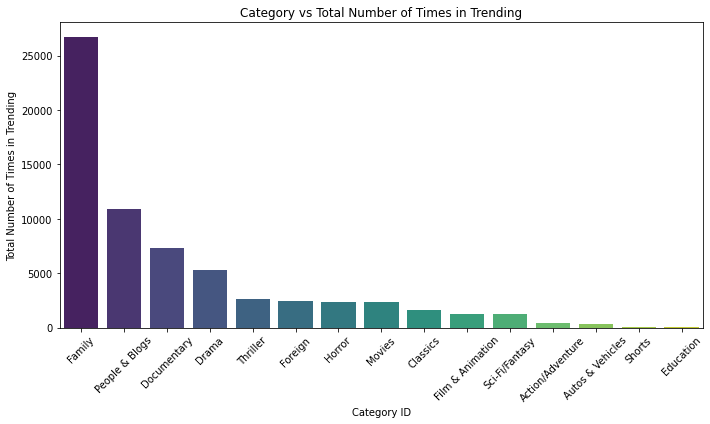

In [44]:
# Step 2: Plot the category vs count of trending appearances
plt.figure(figsize=(10, 6))
sns.barplot(x='Video_Category', y='count', data=category_trending_count, palette='viridis')

plt.title('Category vs Total Number of Times in Trending')
plt.xlabel('Category ID')
plt.ylabel('Total Number of Times in Trending')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

OBSERVATION

Certain categories, such as Entertainment, Music, and News, appear on the trending list more frequently than others, indicating higher popularity and user engagement in these areas. Categories with more diverse and regularly updated content, like Music and Entertainment related to Family, tend to dominate. This suggests that these categories consistently produce viral or widely appealing videos that attract a broad audience.

### 11)Trending Videos that have more Dislikes than their Likes when first appearing on the Trending list

In [45]:
cdf = IN_df.drop_duplicates(subset=['video_id'])

cdf['net_dislikes'] = (cdf['dislikes'] - cdf['likes'])

cdf[cdf['net_dislikes'] >= 0].sort_values(by='net_dislikes', ascending=False).head(3)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,Video_Category,Majority_Videos_Category_Type,times_in_trending,net_dislikes
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12 00:00:00+00:00,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...,Family,Movies,11,3754484
3852,OExRBGfhLKc,Prime Minister Narendra Modi's Mann Ki Baat wi...,2020-08-30T06:04:48Z,UCrwE8kVqtIUVUzKui2WVpuQ,Bharatiya Janata Party,25,2020-09-01 00:00:00+00:00,[None],4672634,250682,968263,187080,https://i.ytimg.com/vi/OExRBGfhLKc/default.jpg,False,False,Subscribe Now - http://bit.ly/2ofH4S4 Stay Upd...,Foreign,NaN,5,717581
2274,1RwQlgS4zQI,Khaali Peeli | Teaser | Ishaan | Ananya Panday...,2020-08-24T04:26:50Z,UC3jMepkLKF8y4iiwWmAB3RA,Zee Studios,1,2020-08-24 00:00:00+00:00,Ishaan Khattar|Ananya Panday|New Movies|Films|...,1038748,41745,355820,31916,https://i.ytimg.com/vi/1RwQlgS4zQI/default.jpg,False,False,"भंकस bandh, शानपट्टी shuru! Meter down karle a...",Film & Animation,Documentary,8,314075


OBSERVATION 

Trending videos with more dislikes than likes often feature controversial or polarizing content. These videos may still gain traction due to viral attention, but negative reception suggests a disconnect with audience expectations or quality. Despite the dislikes, such videos can remain on the trending list due to high overall engagement.

### 12)Categories Analysis based on Views, Likes, Dislikes and Comments 

In [87]:
# Group the data by category and calculate average metrics
category_analysis = IN_df.groupby('Video_Category').agg({
    'view_count': 'mean',
    'likes': 'mean',
    'dislikes': 'mean',
    'comment_count': 'mean'
}).reset_index()

# Renaming columns for clarity
category_analysis.columns = ['Video_Category', 'Average Views', 'Average Likes', 'Average Dislikes', 'Average Comments']


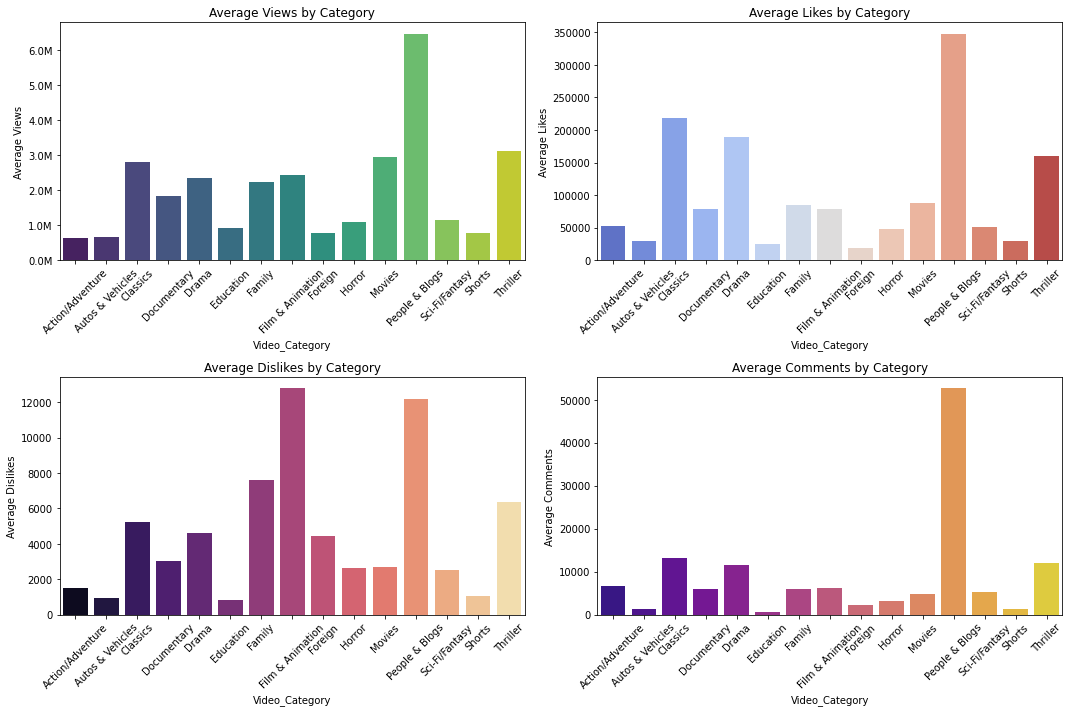

In [83]:
def millions_formatter(y, pos):
    return '%1.1fM' % (y * 1e-6)


# Plotting
plt.figure(figsize=(15, 10))

# Subplot 1: Average Views by Category
plt.subplot(2, 2, 1)
a=sns.barplot(x='Video_Category', y='Average Views', data=category_analysis, palette='viridis')
plt.title('Average Views by Category')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.xticks(rotation=45)

# Subplot 2: Average Likes by Category
plt.subplot(2, 2, 2)
sns.barplot(x='Video_Category', y='Average Likes', data=category_analysis, palette='coolwarm')
plt.title('Average Likes by Category')
plt.xticks(rotation=45)

# Subplot 3: Average Dislikes by Category
plt.subplot(2, 2, 3)
sns.barplot(x='Video_Category', y='Average Dislikes', data=category_analysis, palette='magma')
plt.title('Average Dislikes by Category')
plt.xticks(rotation=45)

# Subplot 4: Average Comments by Category
plt.subplot(2, 2, 4)
sns.barplot(x='Video_Category', y='Average Comments', data=category_analysis, palette='plasma')
plt.title('Average Comments by Category')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

OBSERVATION 

Categories with the highest views, likes, dislikes, and comments  belong to People & Blogs (mostly "Entertaining and Music"), reflecting widespread popularity and audience engagement. Categories like education,  Auto & Vehicles may have fewer views but can generate significant comments and polarized reactions. Videos in niche categories, such as education or tech, may not achieve the highest views but often maintain positive engagement with higher like-to-dislike ratios.

### 13)Which are most Common Words in Video Title and Description

In [113]:
# Combine all titles into a single string
text = " ".join(title for title in IN_df['title'].dropna())

# Define stopwords (you can add more stopwords if necessary)
stopwords = set(STOPWORDS)

# Create the word cloud object
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)


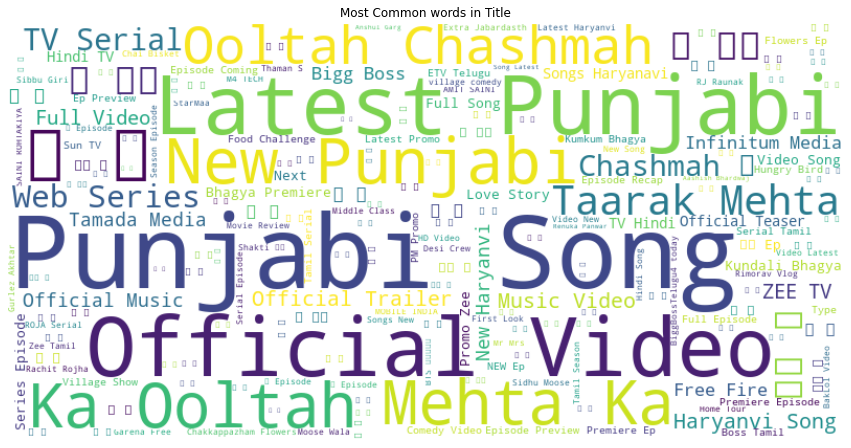

In [114]:
# Display the word cloud using matplotlib
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common words in Title")
plt.show()

In [115]:
# Combine all titles into a single string
text1 = " ".join(title for title in IN_df['description'].dropna())

# Define stopwords (you can add more stopwords if necessary)
stopwords = set(STOPWORDS)

# Create the word cloud object
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text1)

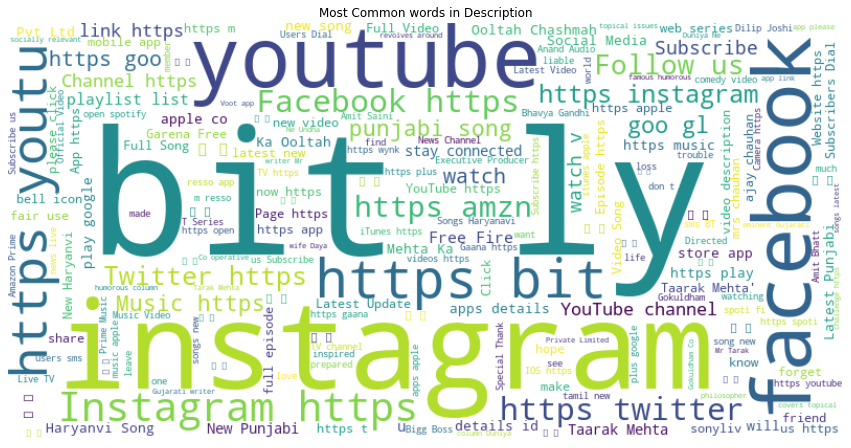

In [116]:
# Display the word cloud using matplotlib
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common words in Description")
plt.show()


The most common words in video titles and descriptions often include keywords like **"official," "latest" "pujabi" and "song"** indicating popular content types. In music videos, words like "official video," "lyrics," and "song" frequently appear. For tech and education videos, words like "how to," "review," and "unboxing" are prevalent. Trending videos often use catchy phrases to capture attention, such as "top," "best," or "amazing." Additionally, keywords related to current events or viral trends often drive higher engagement and visibility.

In description most people use their **instagram link , facebook link and twitter link** so those gets most highlighted.